#  Mathematics of Reinforcement Learning: Homework Sheet 2

In this homework sheet we get to know the Python package Gymnasium.

Make sure you have all the necessary packages (gymnasium, pygame, numpy, matplotlib) installed. You can use `conda install <package>` or `pip install <package>`.

In [1]:
#It may be possible to run the following line of code to install packages:
#!pip install gymnasium
#!pip install pygame

In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import time

## 1. Getting used to Gymnasium

Gymnasium is a Python package that allows the definition of Markov Decision Models. Given a Gymnasium environment `env`, the three key functions are `env.step()`, `env.reset()` and `env.render()`. A brief introduction to these functions is given below. A more detailed introduction can be found at https://gymnasium.farama.org/

### 1.1 The step function
The function `env.step(action)` performs a timestep in the environment, given an action `action`.

**Input parameters:** action, an element from the action space (predefined for each environment)

**Returns:** A tuple with
- next observation, an element from the observation space
- reward (float) - The reward as a result of taking the action
- terminated (bool) - Information about whether the agent has reached a terminal state
- truncated (bool) - True if a truncation condition outside the scope of the MDP is satisfied. This is usually a time limit.
- info (dict) – Contains auxiliary diagnostic information (helpful for debugging, learning, and logging).

### 1.2 The reset function
The `env.reset()` function resets the environment to an initial state.

**Input parameters:**
- seed (optional int) - random seed to initialise the environment
- options (optional dict) - Additional information to specify how to reset the environment 

**Returns:**
- observation, an element from the observation space
- info (dict) – Contains auxiliary diagnostic information (helpful for debugging, learning and logging).

### 1.3 The render function
The function `env.render()` renders the current observation.

**Returns:**
- Render element





## 2. Frozen Lake Example

In this homework sheet we use the environment Frozen Lake by Gymnasium (see https://gymnasium.farama.org/environments/toy_text/frozen_lake/). 

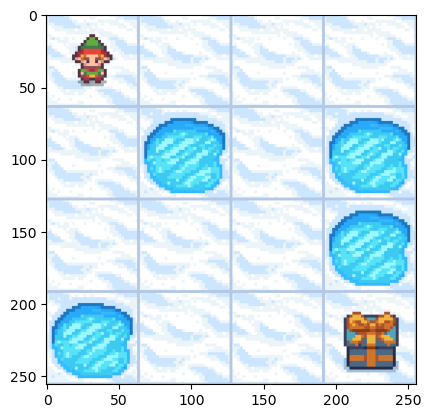

In [3]:
#In the following way an environment env is created:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")

#Visualisation:
env.reset()
plt.imshow(env.render())
plt.show()

The following action and observation spaces are used

| Action space | Observation space |
| --- | --- |
|  `Discrete(4)`| `Discrete(16)`| 

`Discrete(n)` denotes the integers $0,...,n-1$. 

### Action space
The action indicates the direction in which the player is moved. The following encoding is used
* 0: Move left
* 1: Move down
* 2: Move right
* 3: Move up

### Observation space
The observation value represents the players current position on the board.
### Starting state
The starting position is fixed for every map. How to change it is explained below.
### Rewards
The following rewards are used:
* Reaching goal state: +1
* Reaching hole state: 0 
* Any other state: 0

### Episode end
* Termination:
    1. When player moves into a hole
    2. When player reaches the goal
* Truncation:
    1. After 100 timesteps 

**Task 1:** Understand the block of code below. Get used to the movement of the player by adding actions to the input line.

Current state: 5
True False


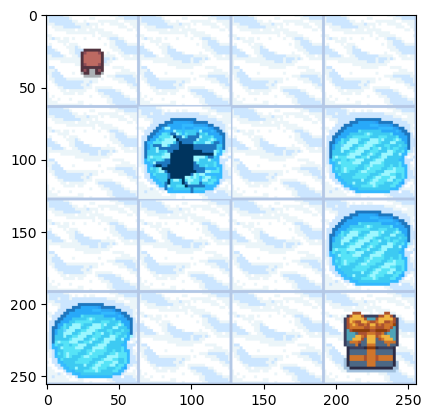

In [5]:
from IPython.display import clear_output

terminated = False
env.reset()
plt.imshow(env.render())
plt.show()
#action_array = np.array([1,1,2,1,2,2])
#step = 0
while terminated == False:
    action = input()
    #action = action_array[step]
    clear_output()   #removes current output for a seemless transition
    observation, reward, terminated, truncated, info = env.step(int(action))
    print("Current state:", observation)
    print(terminated, truncated)
    plt.imshow(env.render())
    plt.show()
    #step += 1
    #time.sleep(1)
env.close()

**Task 2:** Implement a function `random_policy(obs)` that takes the current environment observation `obs` as input and returns a random action (uniformly distributed over the action space). Use the function `numpy.random.randint`.

In [6]:
def random_policy(obs):
    action = np.random.randint(4)
    return action

**Task 3:** Implement a function `sample_path(policy, sample_env)` that simulates a Markov Decision Process in a Frozen Lake environment `sample_env` following a given policy `policy`. The function should return two values: the accumulated reward of the path of the Markov Decision Process and the number of time steps required to terminate. 

In [9]:
def sample_path(policy, sample_env):
    observation, info = sample_env.reset()    
    terminated = False
    time_steps = 0
    acc_reward = 0
    while terminated == False:
        action = policy(observation)
        observation, reward, terminated, truncated, info = sample_env.step(int(action))
        print(observation)
        acc_reward += reward
        time_steps += 1
    sample_env.close()
    
    return acc_reward, time_steps

In [10]:
acc_reward = 0
k = 0
while acc_reward == 0:
    acc_reward, time_steps = sample_path(random_policy, env)
    print(acc_reward, time_steps)
    k += 1

print("Games: ", k)

1
2
1
5
0.0 4
1
0
0
4
4
8
12
0.0 7
0
1
5
0.0 3
0
1
1
1
1
0
0
4
8
9
13
13
13
12
0.0 14
1
1
0
0
4
4
8
12
0.0 8
4
0
0
0
4
8
12
0.0 7
1
0
0
1
1
0
1
1
2
1
2
6
5
0.0 13
0
0
1
2
2
6
10
14
14
13
14
15
1.0 12
Games:  8


### Changing the map 
For the following tasks, you will need to know how to change the map used in the environment. This can be done as follows

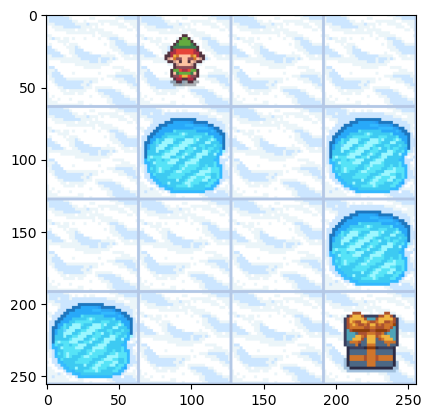

In [11]:
original_map = ["SFFF", "FHFH", "FFFH", "HFFG"]   #"S" means start, "F" frozen, "H" hole and "G" goal 
alternative_map = ["FSFF", "FHFH", "FFFH", "HFFG"]  #changed start position
env = gym.make('FrozenLake-v1', desc=alternative_map, map_name="4x4", is_slippery=False, render_mode="rgb_array")
env.reset()
plt.imshow(env.render())

The above procedure can be used to change the start position in the original map.

**Task 4:** Implement a function `point_analysis(policy, sample_map, N = 1000)` that simulates `N` samples of a Markov Decision Process, following a policy `policy` in a map `sample_map`. Return three values: The mean accumulated reward (which is equal to the empirical value function for the starting position), the standard deviation of the accumulated rewards and the average number of time steps required to successfully reach the goal state.

In [71]:
def point_analysis(policy, sample_map, N = 1000):
    
    rewards_sum = np.zeros(N)
    total_timesteps = 0
    env = gym.make('FrozenLake-v1', desc=sample_map, map_name="4x4", is_slippery=False, render_mode="rgb_array")

    for i in range(N):
        observation, info = env.reset()
        terminated = False
        timesteps = 0
        while terminated == False:
            action = policy(observation)
            observation, reward, terminated, truncated, info = env.step(int(action))
            timesteps += 1
            if reward == 1:
                total_timesteps += timesteps
        env.close()
        rewards_sum[i] = reward
    
    reward_mean = np.mean(rewards_sum)
    reward_variance = np.var(rewards_sum) 
    
    if reward_mean == 0:
        reward_timemean = 0
    else:
        reward_timemean = total_timesteps/np.sum(rewards_sum)
    
    return reward_mean, reward_variance, reward_timemean

In [57]:
point_analysis(random_policy, original_map)

(0.016, 0.015744000000000005, 12.875)

**Task 5:** Implement a function `map_analysis(policy, N = 1000)` that takes as input a policy `policy` and runs the function `point_analysis` for every reasonable starting state (non hole and goal states) in the original Frozen Lake map. To do this, create a new map for all reasonable starting states, then run the `point_analysis` function on that map with the policy `policy` as the input.

Visualise the output for all start states in 3 plots. You can copy the visualisations shown at the following link: https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html

In [58]:
def map_analysis(policy, original_map, show_map = False, N = 1000):

    original_map_startless = [string.replace("S", "F") for string in original_map] # remove fixed started position
    matrix_timemean = np.zeros([len(original_map_startless[0]), len(original_map_startless)]) # only for square games

    for row_index, row in enumerate(original_map_startless):

        for column_index, column in enumerate(row):

            if column == "F":

                # Create a deep copy of the map
                original_map_with_start = original_map_startless[:]
                # Convert the specific row to a list to modify it
                row_as_list = list(original_map_with_start[row_index])
                row_as_list[column_index] = "S"
                # Convert back to a string after modification
                original_map_with_start[row_index] = "".join(row_as_list)

                reward_mean, reward_variance, reward_timemean = point_analysis(policy, original_map_with_start, N = N)
                matrix_timemean[row_index][column_index] = reward_timemean
    
    Z = matrix_timemean[::-1] # needs matrix-valued input
    fig, ax0 = plt.subplots()
    c = ax0.pcolor(Z)
        
    return matrix_timemean

In [1]:
matrix_timemean = map_analysis(random_policy, original_map, N = 10000)

NameError: name 'map_analysis' is not defined

**Task 6:** Implement a function `optimal_policy(obs)` that takes the current environment observation `obs` as input and returns an action, that follows an optimal strategy. Run the `map_analysis` function for the policy `optimal_policy`.

In [60]:
# SOLUTION: JUST GIVE ECPLICIT POLICY TO FUNCTION

def optimal_policy(obs):
    #  policy, where every state considers neighbours mean time to reach goal and take lowest
    
    # flatten matrix
    neigbours_shifts = [-1, +len(timemean[0]), +1, -len(timemean[0])]
    
    time_array = timemean.flatten()
        
    best_time = np.inf
    for action, i in enumerate(neigbours_shifts): # actions modeled as 0,1,2,3
        neighbour_position = obs+i
        # get transitions and update it along the way
        if neighbour_position>0 and neighbour_position<len(time_array)-1:
            time_of_neighbour = time_array[neighbour_position]
            if time_of_neighbour and best_time > time_of_neighbour:
                best_time = time_of_neighbour
                best_action = action
    
    return best_action
    
    # consider only neighbours in bound of obs +1, -1, +len(row), -len(row)

In [61]:
neigbours_shifts = [-1, +len(timemean[0]), +1, -len(timemean[0])]
neigbours_shifts

[-1, 4, 1, -4]

**Task 7:** Implement a function `epsilon_greedy_policy(obs)` that takes the current environment observation `obs` as input and returns an action that follows the optimal policy with probability $0.8$ and follows the random policy with probability $0.2$.  Run the `map_analysis` function for the policy `epsilon_greedy_policy` .

In [62]:
def epsilon_greedy_policy(obs):
    # choose next observation based on
    rv = np.random.binomial(1, p=0.8)
    
    return rv*optimal_policy(obs) + (1-rv)*random_policy(obs)

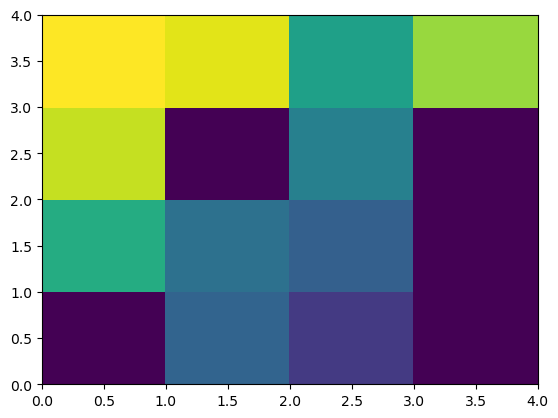

In [76]:
timemean = map_analysis(random_policy, original_map, N=1000)

In [77]:
timemean

array([[13.44444444, 12.84615385,  7.6       , 11.36363636],
       [12.28571429,  0.        ,  5.8       ,  0.        ],
       [ 8.26470588,  4.96808511,  4.096     ,  0.        ],
       [ 0.        ,  4.27222222,  2.25986079,  0.        ]])

In [75]:
print("Random Policy stats", point_analysis(random_policy, original_map))
print("Greedy Policy stats", point_analysis(epsilon_greedy_policy, original_map))
print("Optimal Policy stats", point_analysis(optimal_policy, original_map))

Random Policy stats (0.013, 0.012830999999999999, 13.615384615384615)
Greedy Policy stats (0.369, 0.232839, 24.119241192411923)


KeyboardInterrupt: 